In [5]:
import chime
chime.notify_exceptions()

# Deep Learning 2024

In this notebook
- The end-to-end crash course of DL is explained as coding.

Classroom code: 
- o64a7np

Notebook Authors:
- Eng. Ahmed Métwalli
- Eng. Alia Elhefny

## Environment Preparation:
- Download anaconda: https://www.anaconda.com/download/success
- Create a new environment called 'DL_SEPT_2024'
    - Set Python version 3.11.x
    - Install:
        - Notebook
        - JupyterLab
        - VS Code
        - CMD Prompt
        - Powershell Prompt
    - In Python install basic packages (pip install `package`):
        - pandas
        - numpy
        - matplotlib
        - seaborn
        - tensorflow
        - keras
        - sklearn
        - chime

## Section 1

In our traditional Data Science Lifecycle, the main change we have over the course is within the Data Modelling block, where the algorithm used is neural network related, instead of Machine Learning methods.

<img src = "DS!.png">

### Mathematical Model of the Perceptron
A perceptron a.k.a (Linear Binary Classifier) is a linear classifier that makes decisions based on a linear function. The mathematical model can be represented as follows:

1. **Linear Combination:**
   $$
   z = \mathbf{W} \cdot \mathbf{X} + b
   $$
   - **W**: Weight vector.
   - **X**: Input feature vector.
   - **b**: Bias term.

2. **Activation Function:**
   $$
   y = \text{step}(z)
   $$
   - The step function is a threshold function that outputs 1 if z >= 0 and 0 otherwise.

3. **Perceptron Learning Rule:**
   The perceptron adjusts its weights and bias to minimize the classification error using the following rule:
   $$
   \Delta \mathbf{W} = \eta \cdot (y_{\text{true}} - y_{\text{pred}}) \cdot \mathbf{X}
   $$
   $$
   \Delta b = \eta \cdot (y_{\text{true}} - y_{\text{pred}})
   $$
   - **eta**: Learning rate.
   - **y_true**: True label of the data point.
   - **y_pred**: Predicted label by the perceptron.

### Steps to Build the Perceptron Class

1. **Initialization:**
   - Define a class `Perceptron` with attributes for the learning rate, number of iterations, weights, and bias.
   - Initialize the weights and bias to zero.

2. **Training (`fit` Method):**
   - For each training example, compute the linear combination `z`.
   - Apply the activation function to determine the predicted output `y`.
   - Update the weights and bias using the perceptron learning rule.

3. **Prediction (`predict` Method):**
   - Compute the linear combination `z` for given input features.
   - Apply the activation function to predict the output.

This unit is called Perceptron

<img src = "Perceptron.gif">

### Objective of the Code

- **Train the Perceptron** to solve logical operations such as OR, AND, and XOR.
- **Visualize Decision Boundaries** to understand how the perceptron separates data points.
- **Highlight Limitations** by demonstrating that the perceptron fails to solve non-linearly separable problems like XOR.

### Key Takeaways [HINTS]
- The perceptron is effective for linearly separable data.
- For complex datasets, more sophisticated models like Multi-Layer Perceptrons are required.


Training Perceptron on OR dataset...


,Feature 1,Feature 2,Label
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


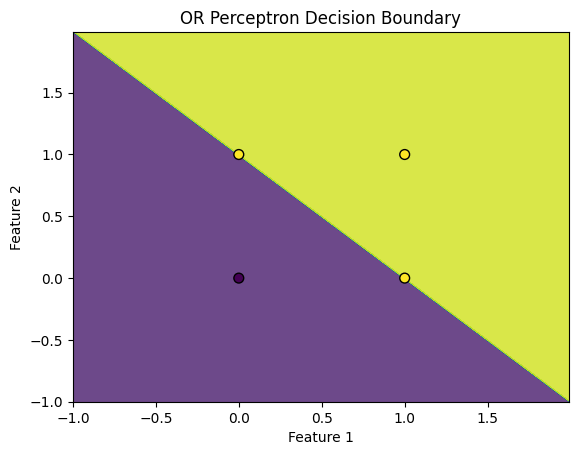

,Iteration,Weights,Bias
0,0,"[0.0, 0.0]",0
1,1,"[0.0, 0.1]",0.0
2,2,"[0.1, 0.1]",0.0
3,3,"[0.1, 0.1]",-0.1
4,4,"[0.1, 0.1]",-0.1
5,5,"[0.1, 0.1]",-0.1
6,6,"[0.1, 0.1]",-0.1
7,7,"[0.1, 0.1]",-0.1
8,8,"[0.1, 0.1]",-0.1
9,9,"[0.1, 0.1]",-0.1


Training Perceptron on AND dataset...


,Feature 1,Feature 2,Label
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


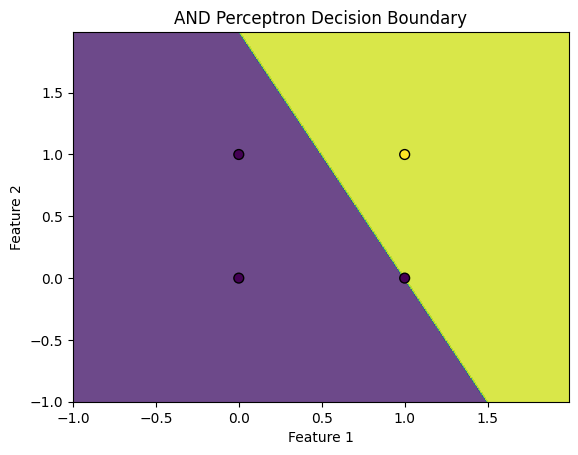

,Iteration,Weights,Bias
0,0,"[0.0, 0.0]",0
1,1,"[0.1, 0.1]",0.0
2,2,"[0.2, 0.1]",-0.1
3,3,"[0.2, 0.1]",-0.2
4,4,"[0.2, 0.1]",-0.2
5,5,"[0.2, 0.1]",-0.2
6,6,"[0.2, 0.1]",-0.2
7,7,"[0.2, 0.1]",-0.2
8,8,"[0.2, 0.1]",-0.2
9,9,"[0.2, 0.1]",-0.2


Training Perceptron on XOR dataset (expected to fail)...


,Feature 1,Feature 2,Label
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


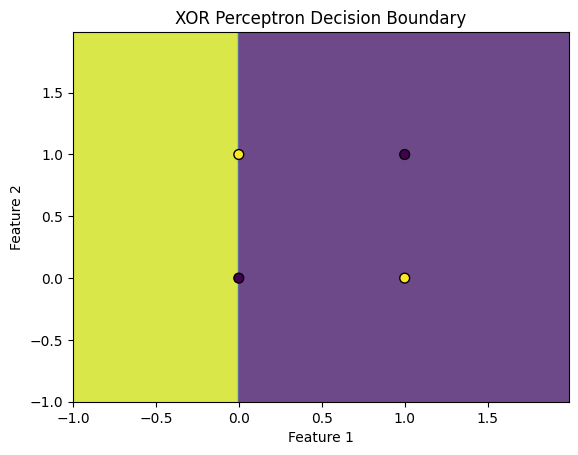

,Iteration,Weights,Bias
0,0,"[0.0, 0.0]",0
1,1,"[-0.1, 0.0]",-0.1
2,2,"[-0.1, 0.0]",0.0
3,3,"[-0.1, 0.0]",0.0
4,4,"[-0.1, 0.0]",0.0
5,5,"[-0.1, 0.0]",0.0
6,6,"[-0.1, 0.0]",0.0
7,7,"[-0.1, 0.0]",0.0
8,8,"[-0.1, 0.0]",0.0
9,9,"[-0.1, 0.0]",0.0


In [6]:
import numpy as np, pandas as pd # Data manipulation libraries
import matplotlib.pyplot as plt # Data visualization

# Define the Perceptron class with logging capability
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        
        self.learning_rate = learning_rate # The rate at which the perceptron updates its weights.
        self.n_iters = n_iters # The number of iterations for training.
        self.activation_func = self._unit_step_function # The activation function used to make predictions, which is defined later.
        self.weights = None # The weights assigned to features, initialized later.
        self.bias = None # The bias term, initialized later.
        self.log = pd.DataFrame(columns=["Iteration", "Weights", "Bias"]) # DF for logging purposes.

    def _unit_step_function(self, x):
        return np.where(x >= 0, 1, 0) # Applying unit step function as activation function 
    

    def fit(self, X, y):
        n_samples, n_features = X.shape # returns the number of samples (rows) and features (columns).
        self.weights = np.zeros(n_features) # Initializes the weights as zeros
        self.bias = 0 # Initializes the bias as zero.
        self._log(0) # Logging initial weights and bias
        # Gradient descent algorithm
        for iteration in range(1, self.n_iters + 1): #The outer loop runs for the number of iterations (self.n_iters).
            for idx, x_i in enumerate(X): #The inner loop iterates over each sample x_i in the dataset X.
                linear_output = np.dot(x_i, self.weights) + self.bias #Calc. the linear combination of weights and features plus bias.
                y_predicted = self.activation_func(linear_output) #Apply activation func.

                # Perceptron learning rule update
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i # Equation applied
                self.bias += update

            # Logging weights and bias at each iteration
            self._log(iteration)

    def _log(self, iteration):
        """Log the weights and bias for each iteration."""
        log_entry = pd.DataFrame({
            "Iteration": [iteration],
            "Weights": [self.weights.copy()], # Because weights are stored in array-like so that are mutable 
            "Bias": [self.bias] # Bias is scalar immutable therefore no copy operation added
        })
        self.log = pd.concat([self.log, log_entry], ignore_index=True)

    def predict(self, X):
        """This function uses the trained weights and bias to predict labels for input data X."""
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

# Utility class for dataset creation and visualization
class Utility: #Utility programming-wise covers 
    @staticmethod #Static method unlike classes with init, it doesn't need to access 'self'
    def plot_decision_boundary(X, y, model, title):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), #np.meshgrid to create a grid of points
                            np.arange(y_min, y_max, 0.01))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
        plt.title(title)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

    @staticmethod
    def create_logical_dataset(logical_operator):
        if logical_operator == 'OR':
            X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
            y = np.array([0, 1, 1, 1])
        elif logical_operator == 'AND':
            X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
            y = np.array([0, 0, 0, 1])
        elif logical_operator == 'XOR':
            X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
            y = np.array([0, 1, 1, 0])
        else:
            raise ValueError("Unknown logical operator!")
        
        # Create a pandas DataFrame for better visualization
        df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
        df["Label"] = y
        display(df)
        return X, y

# Helper function to train and visualize the perceptron on a given dataset
class Helper: #Helper generally focused on performing small, specific series of operations (Handling scenarios)
    @staticmethod
    def train_and_visualize(logical_operator):
        X, y = Utility.create_logical_dataset(logical_operator)
        perceptron = Perceptron(learning_rate=0.1, n_iters=10)
        perceptron.fit(X, y)
        Utility.plot_decision_boundary(X, y, perceptron, f'{logical_operator} Perceptron Decision Boundary')
        
        # Display the weights and bias log in a DataFrame
        display(perceptron.log)

# OR Problem
print("Training Perceptron on OR dataset...")
Helper.train_and_visualize('OR')

# AND Problem
print("Training Perceptron on AND dataset...")
Helper.train_and_visualize('AND')

# XOR Problem
print("Training Perceptron on XOR dataset (expected to fail)...")
Helper.train_and_visualize('XOR')


### Conclusion: 
- The perceptron model works perfectly for linearly separable data such as OR and AND, but fails to solve the XOR problem due to its linear decision boundary.
- For non-linearly separable data, we need to use more advanced models like Multi-Layer Perceptrons.

### Some Terminologies!!:
DL:
- Epoch: One complete pass through the entire training dataset. This involves processing every sample in the dataset once.
- Iteration: In this code, an iteration refers to a single update of the model's parameters. Here, the number of iterations is set to the number of epochs, as each epoch updates the model for every sample in the dataset.

Programming:
- Utility: Utilities are typically more general-purpose and can be applied in a variety of contexts. They may include operations like file handling, data transformation, or mathematical calculations.
- Helper: Helpers are typically more narrowly scoped to support a specific part of an application or module. For example, a "helper" might be used to handle string formatting, validate inputs, or perform a small, repetitive task.

### Classwork 1: Solving the XOR Problem with a Multi-Layer Perceptron Using Keras

#### Objective:
- Implement a Multi-Layer Perceptron (MLP) using Keras to solve the XOR problem.
- Understand how to use high-level deep learning libraries for building, training, and evaluating neural networks.

#### Steps to Complete the Assignment:

#### Hints
```python
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Create the XOR inputs and outputs
X = np.array(...)
y = np.array(...)
# Build the model
model = Sequential()
model.add(Dense(...))
model.add(Dense(...))
# Compile the model
model.compile(loss='...', optimizer='...', metrics=['accuracy'])
# Train the model
model.fit(..., ..., epochs=...)
# Evaluate the model
loss, accuracy = model.evaluate(...)
print(f'Accuracy: {accuracy*100:.2f}%')





